**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You must predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.


**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
( You can google “Component Analysis with KMeans visuals – Kaggle” and learn how to do this step from Kaggle website)
4.	You don’t need to do PCA right now. 
5.	Choose the proper method to train the model:
binary classification Models: Logistic regression, Support vector machine, Naive Bayes, k-nearest neighbors, neural network, Decision tree…

6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.


In [1]:
## import the necessary packages
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

### 1. Load the data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
print (train_data.shape)
print (test_data.shape)

(25000, 25)
(5000, 24)


In [3]:
#check dtypes
train_data.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [4]:
#check if there is null
train_data.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

Data is clean and there is no missing value issues

### 2.Distinguish Categorical and Continuous Variables

In [20]:
cat_v = []
con_v = []
for c in train_data.columns:
    # Set the variables which owns less than 15 values as categorical variables
    if len(train_data[c].value_counts().index)<=15:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [22]:
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


### 3. Basic feature analysis

i. Check the difference of patterns between train and test data by visualization.

Histogram for comparing categorical variables

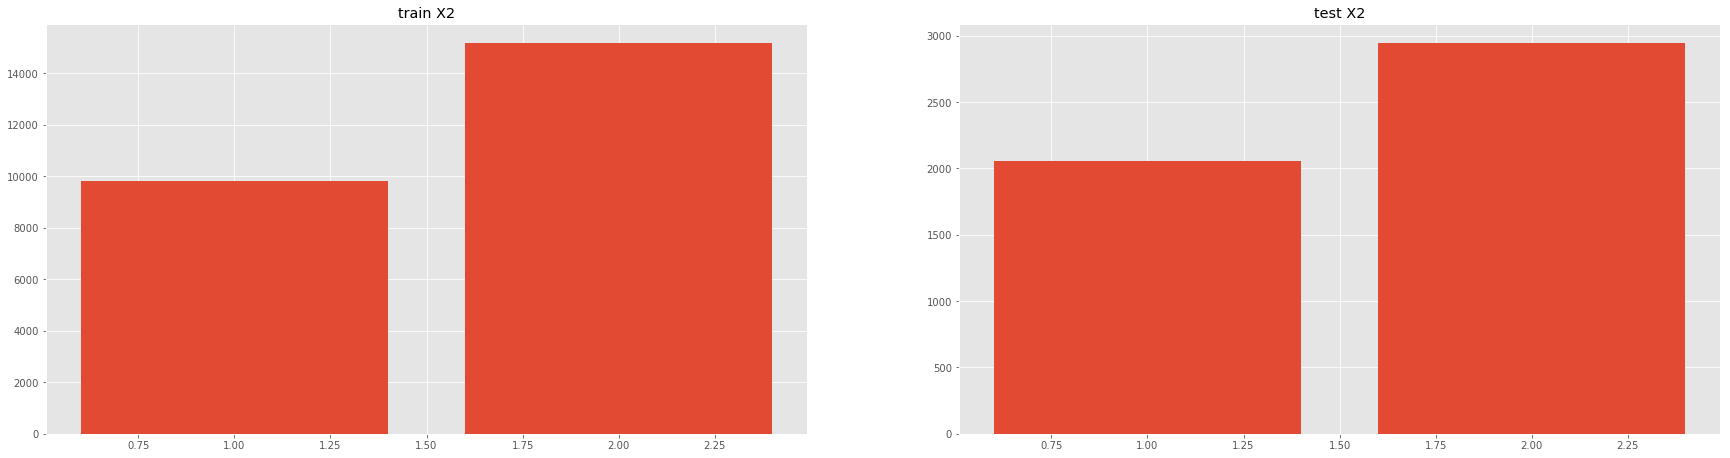

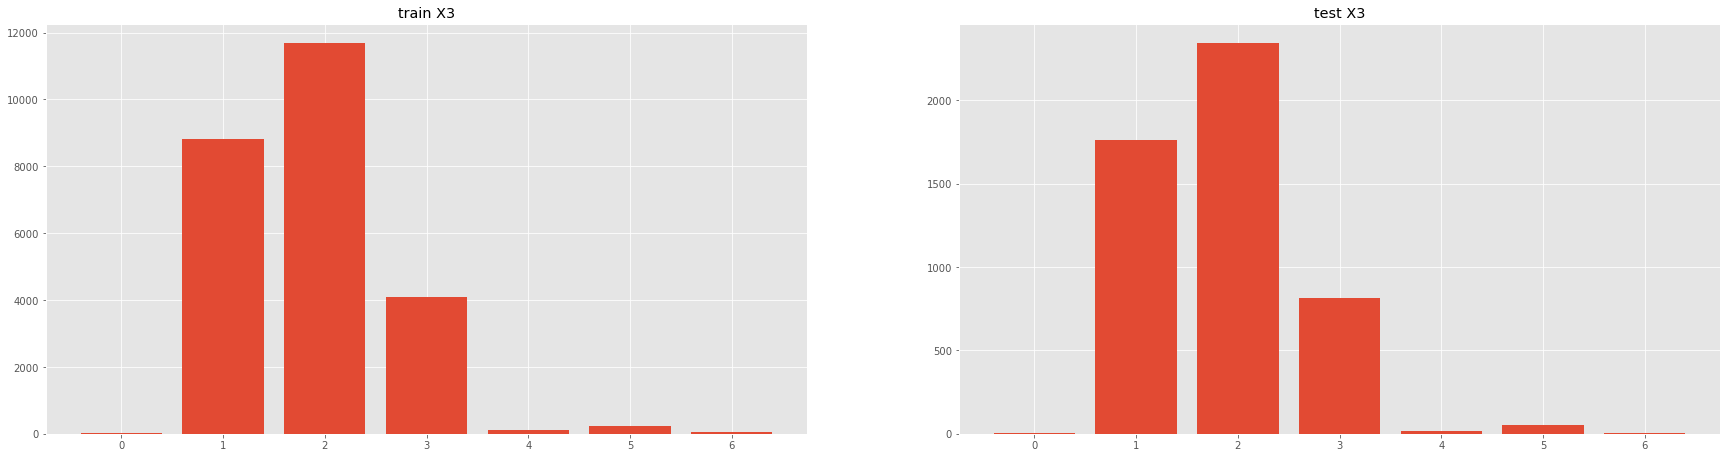

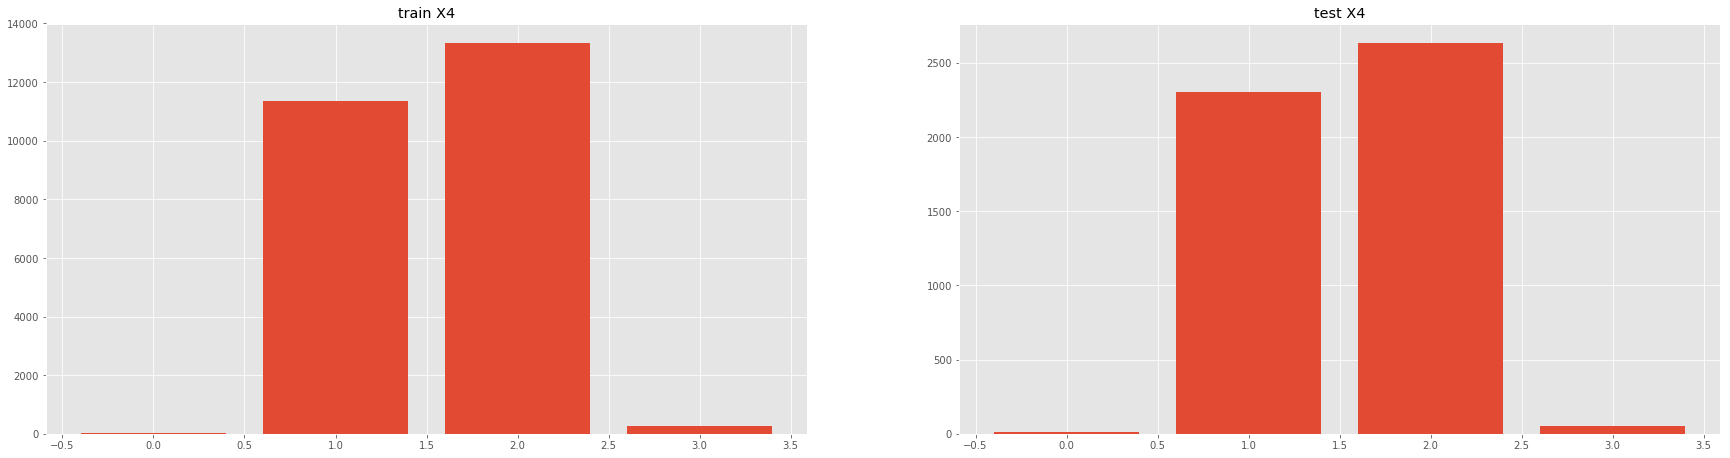

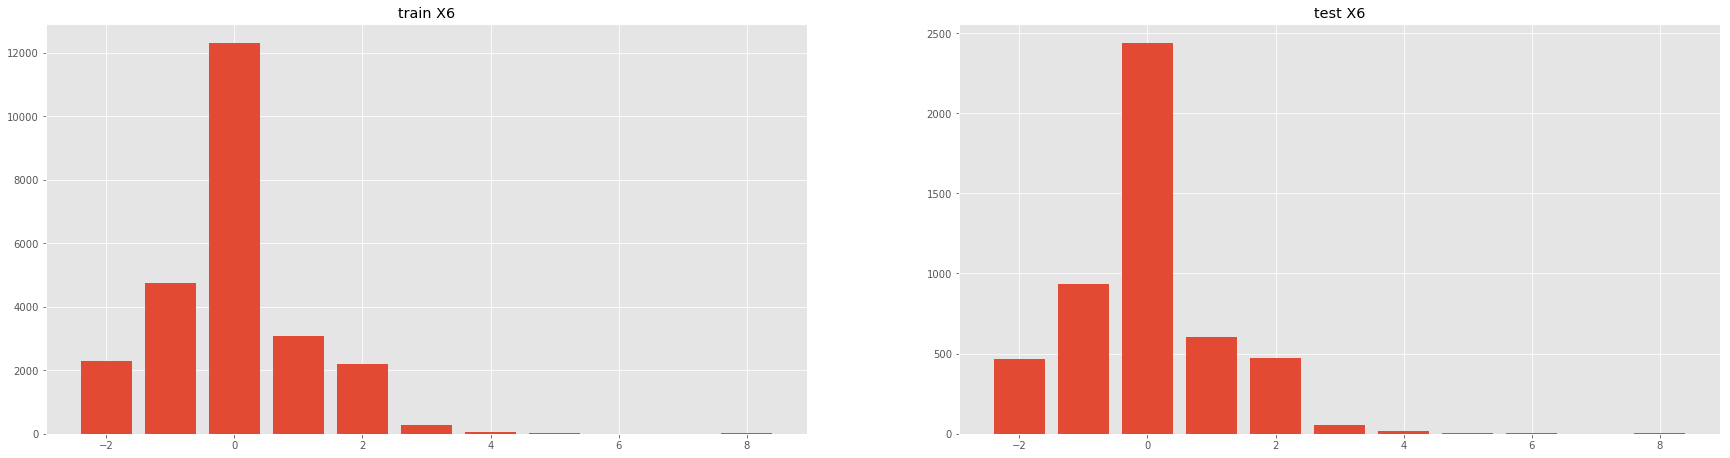

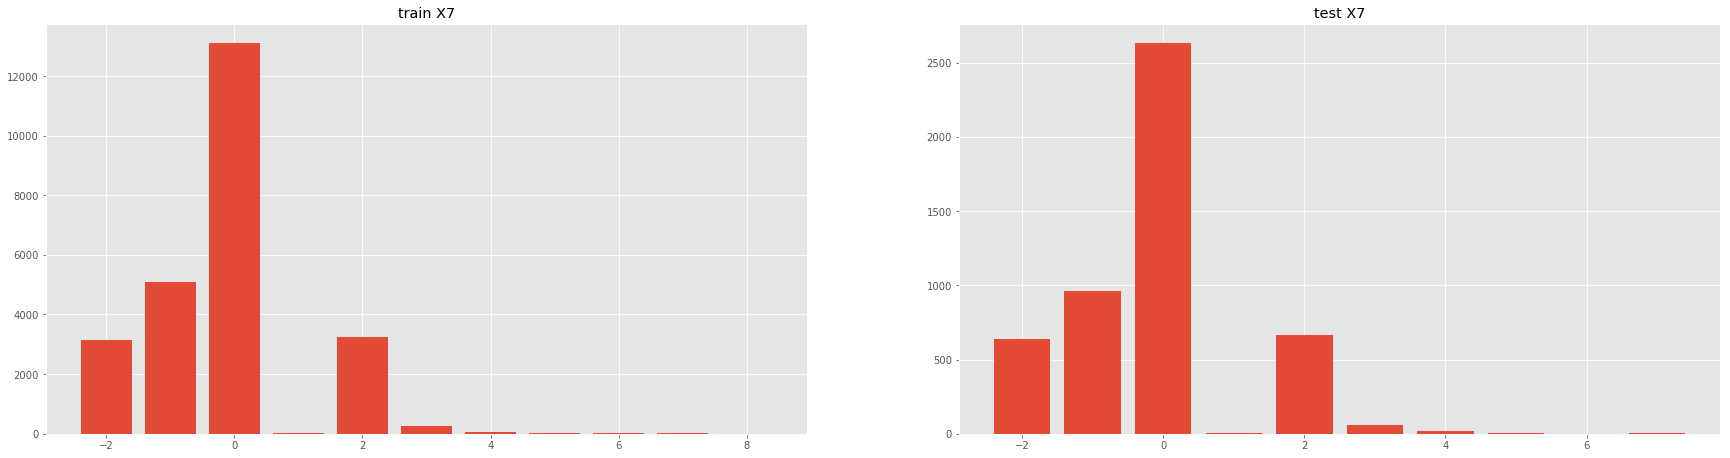

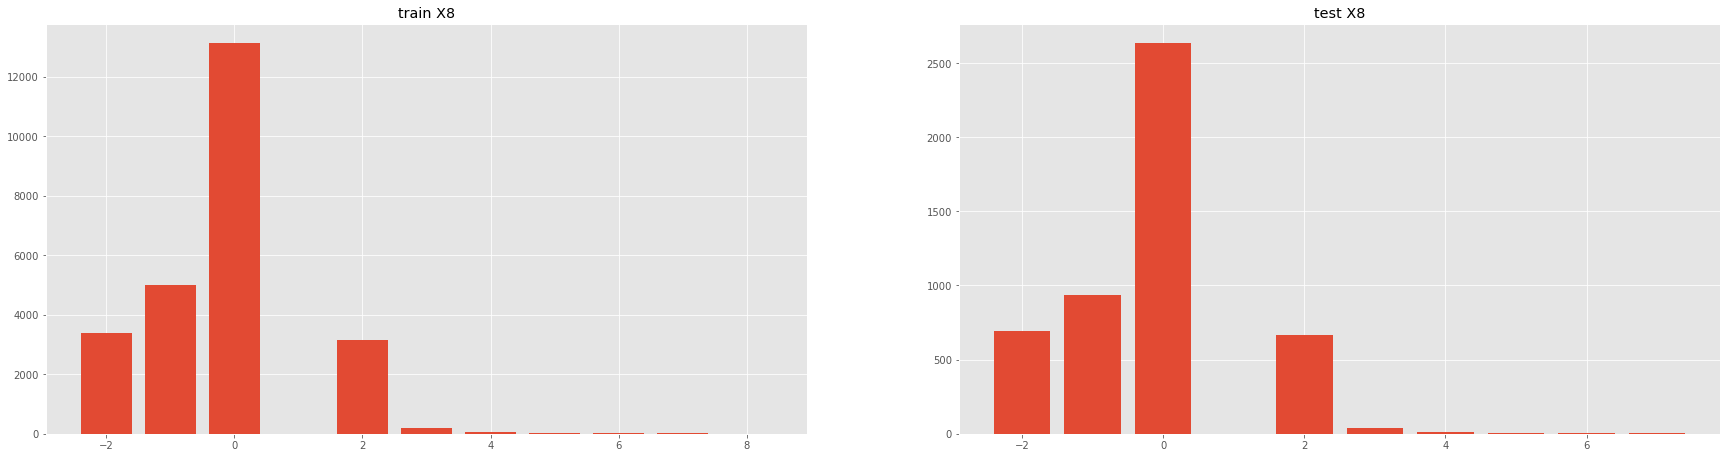

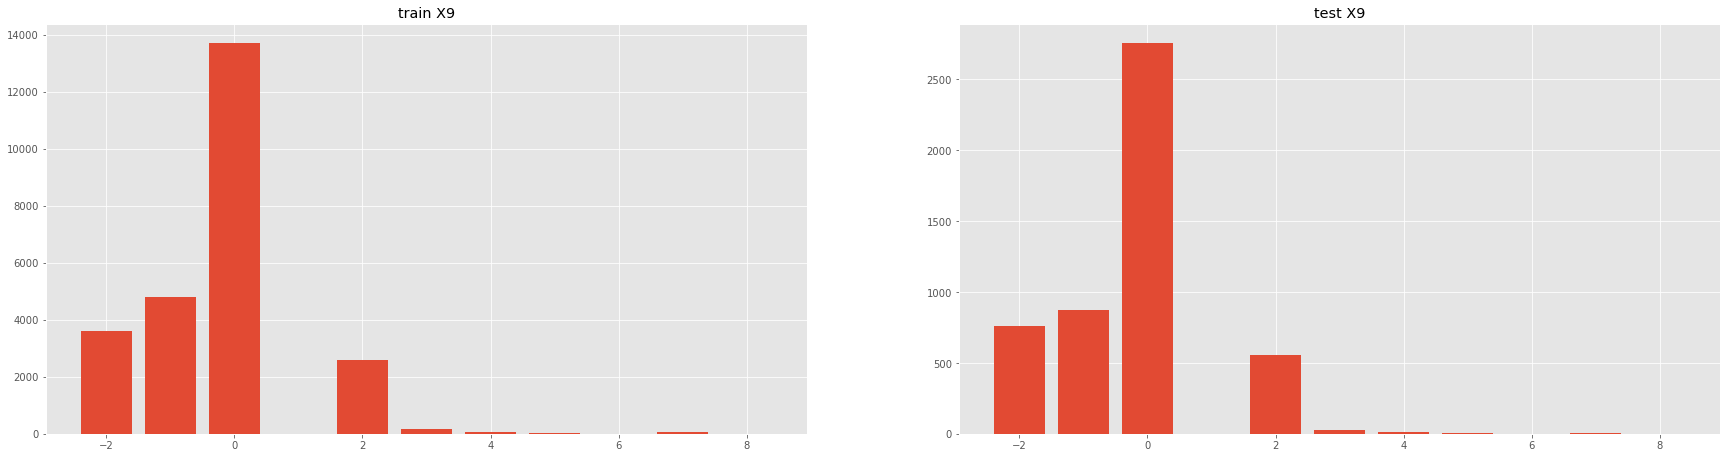

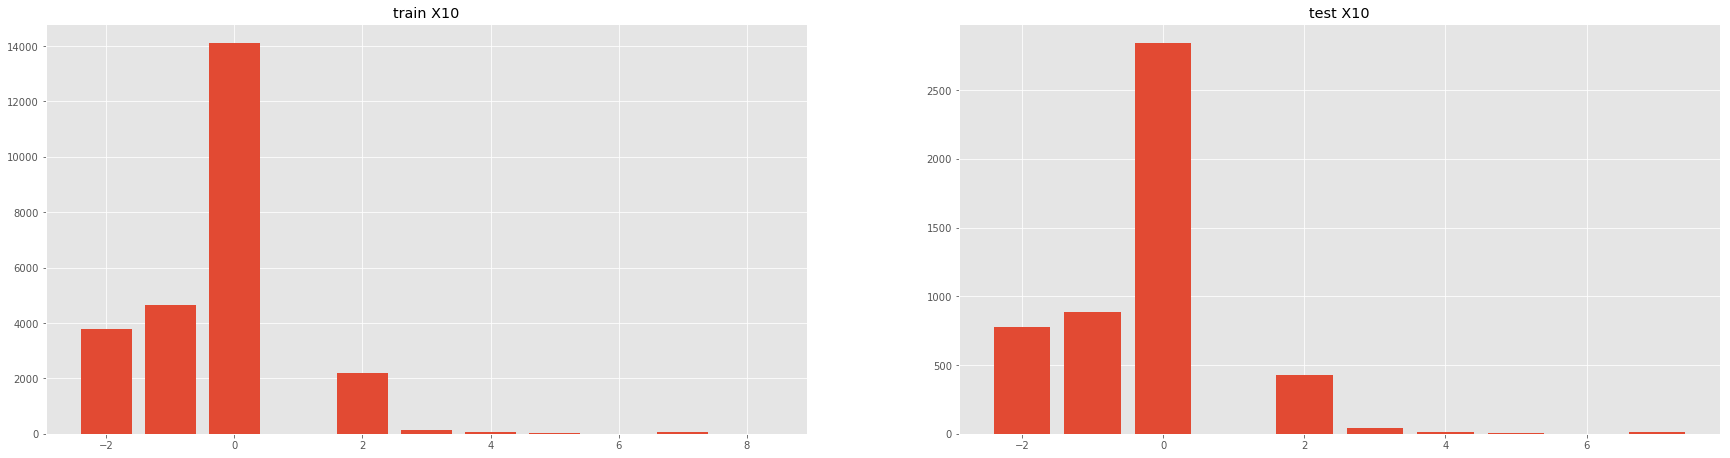

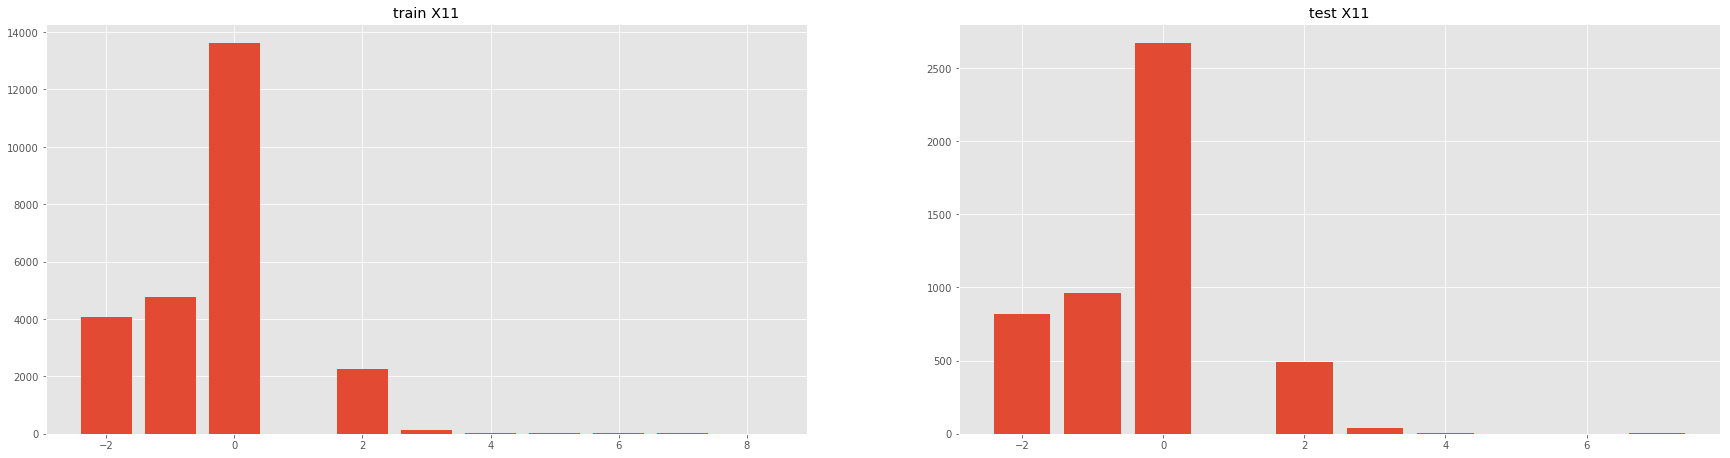

In [27]:
count=1
for i in range(len(cat_v)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(cat_v),2,count)
    plt.bar(train_data[cat_v[i]].value_counts().index, train_data[cat_v[i]].value_counts().values)
    plt.title("train "+cat_v[i])
    
    plt.subplot(len(cat_v),2,count+1)
    plt.bar(test_data[cat_v[i]].value_counts().index, test_data[cat_v[i]].value_counts().values)
    plt.title("test "+cat_v[i])
    count+=2

Categorical variables in train and test data share similar trends.

Violin plot for comparing continuous variables -- showing maximum/minimum & distribution.
<p>Boxplot also works.

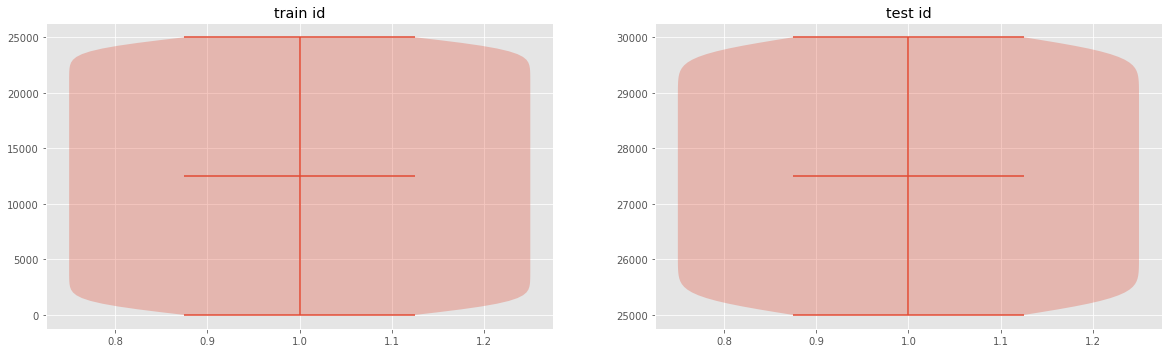

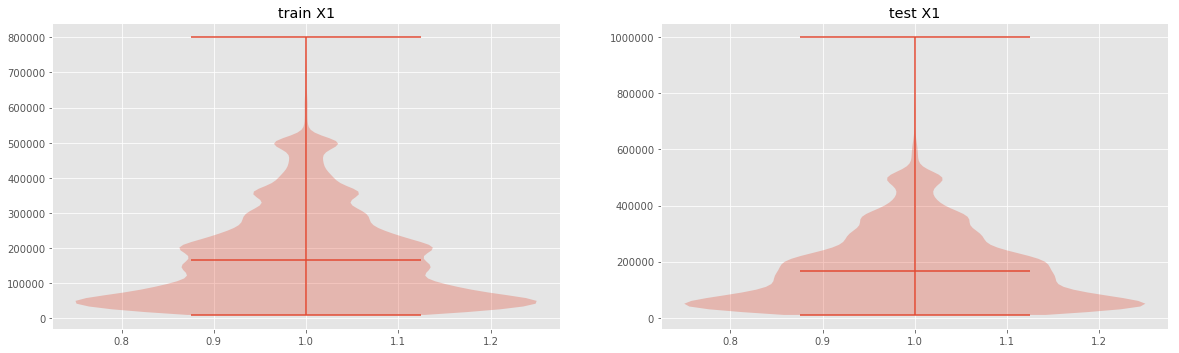

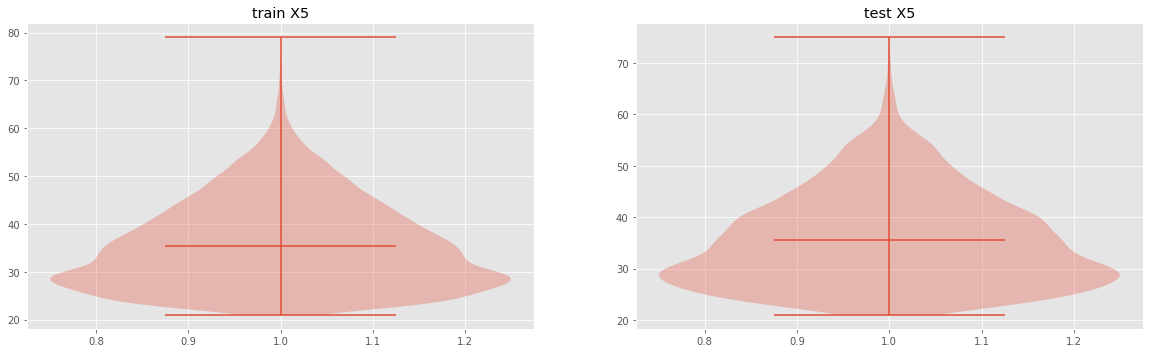

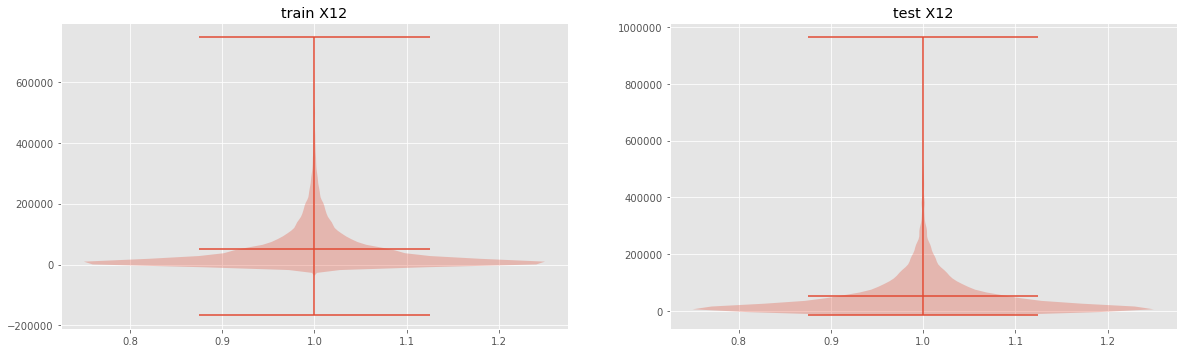

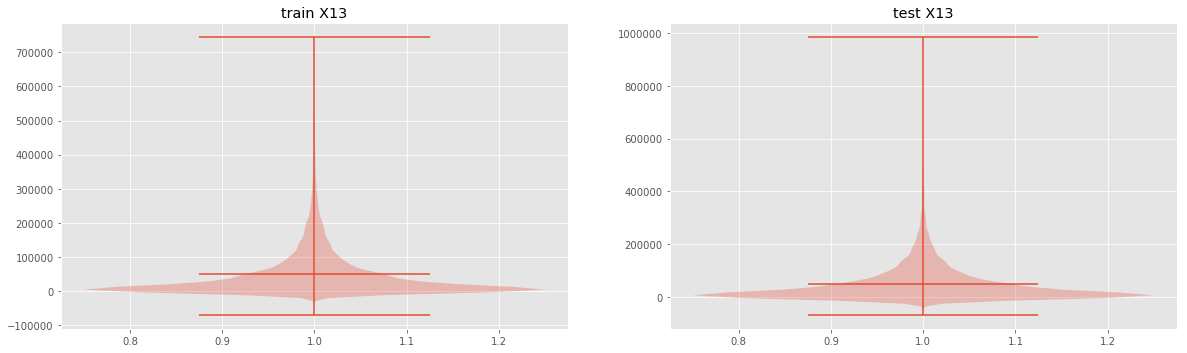

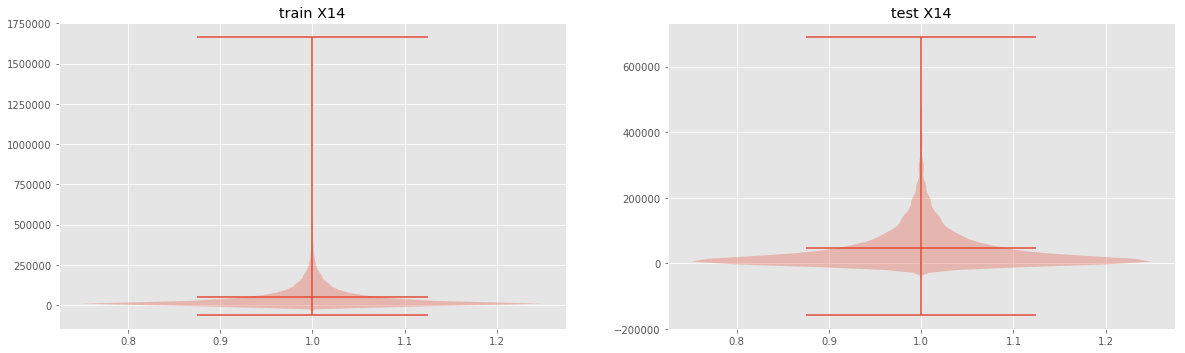

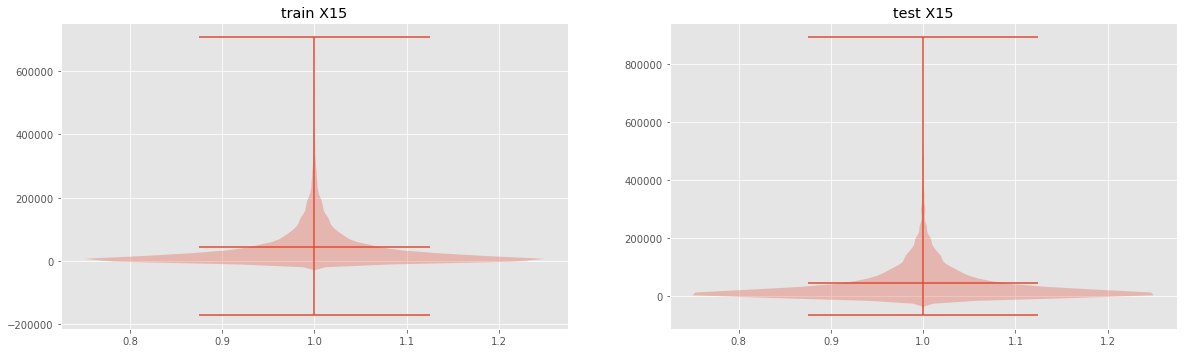

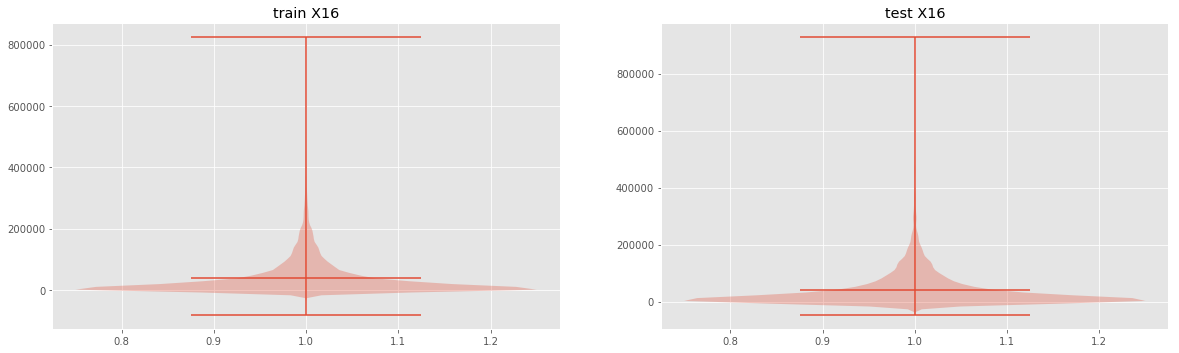

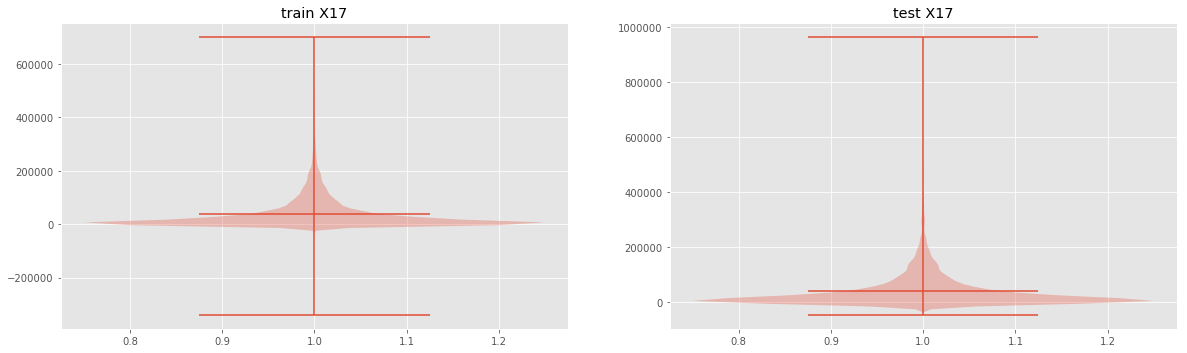

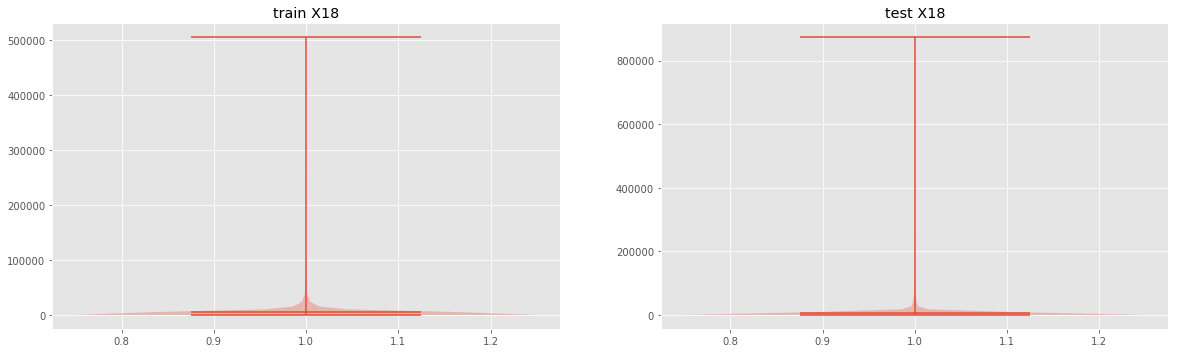

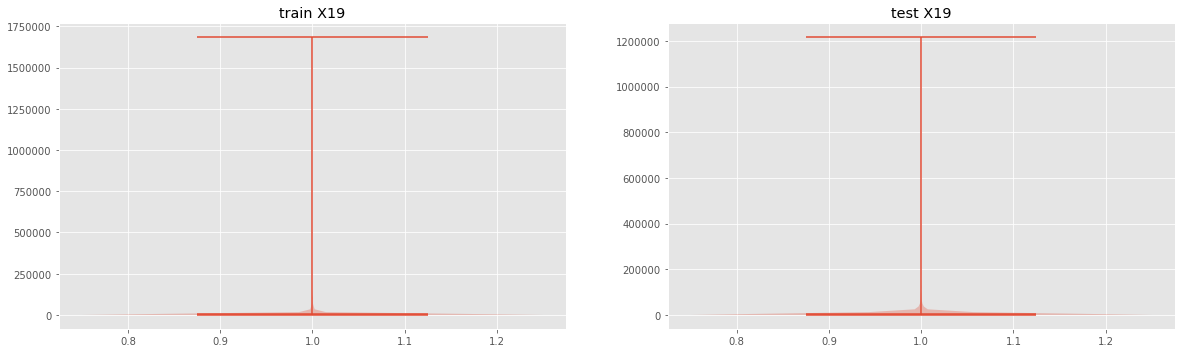

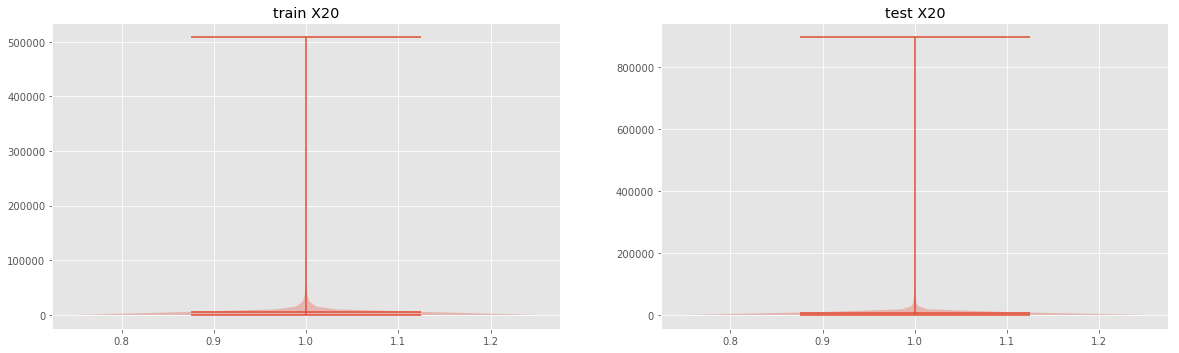

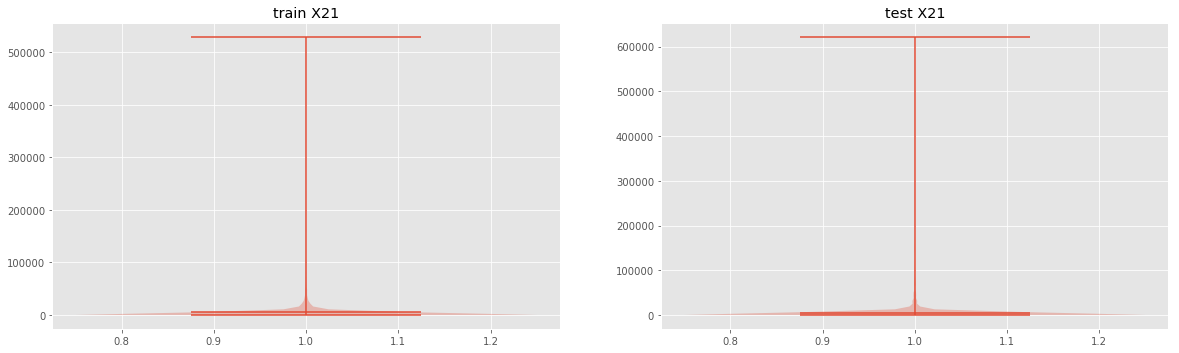

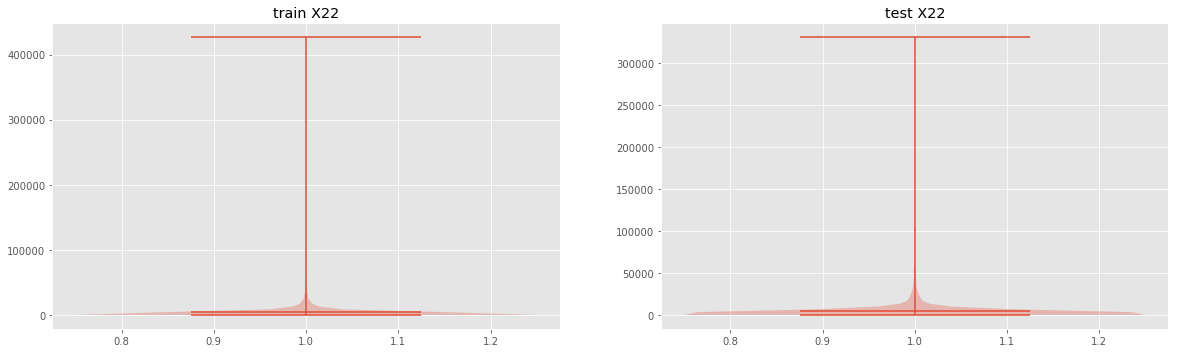

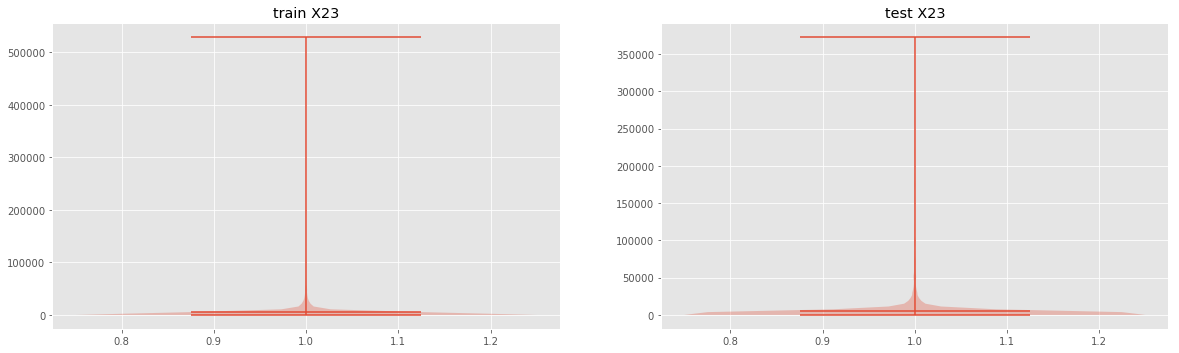

In [28]:
count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(train_data[con_v[i]],showmeans=True)
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(test_data[con_v[i]],showmeans=True)
    plt.title("test "+con_v[i])
    count+=2

X18 - X23 might have outliers in dataset.

ii. Correlation matrix to check if there are linear relationships between features

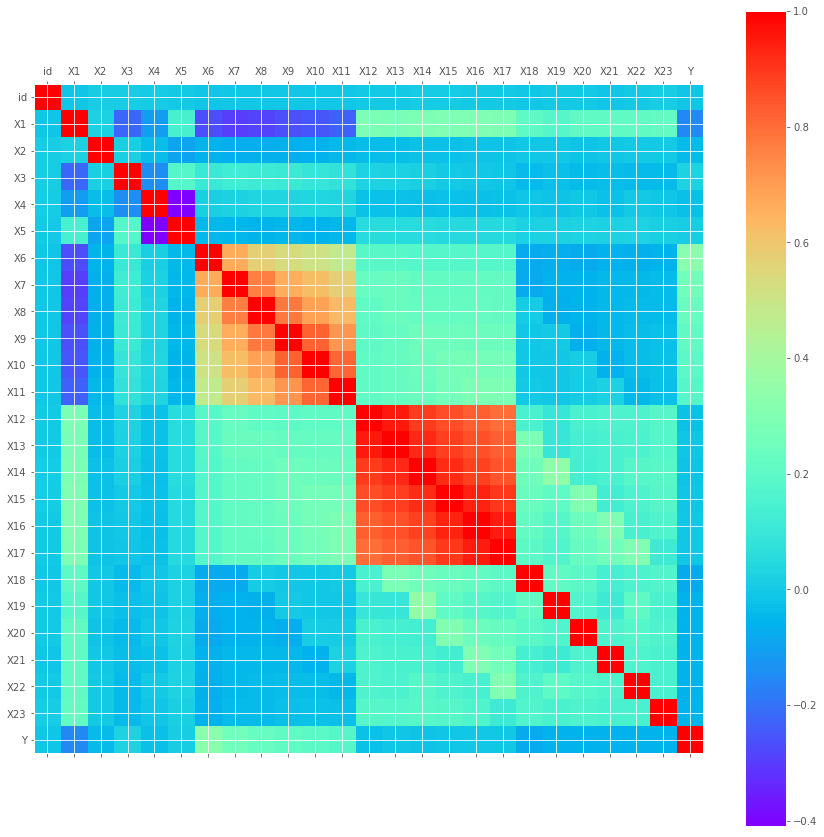

In [33]:
def plot_corr(df):
    size = 15
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train_data)

1. Low correlation means there's no linear relationship, it doesn't mean there is no relationship.
2. Good feature subsets contain features highly correlated with the classification, yet uncorrelated to each other.
3. Multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity (and thus, with lower standard errors), those coefficients might be significant.

iii. Check the pattern of labels

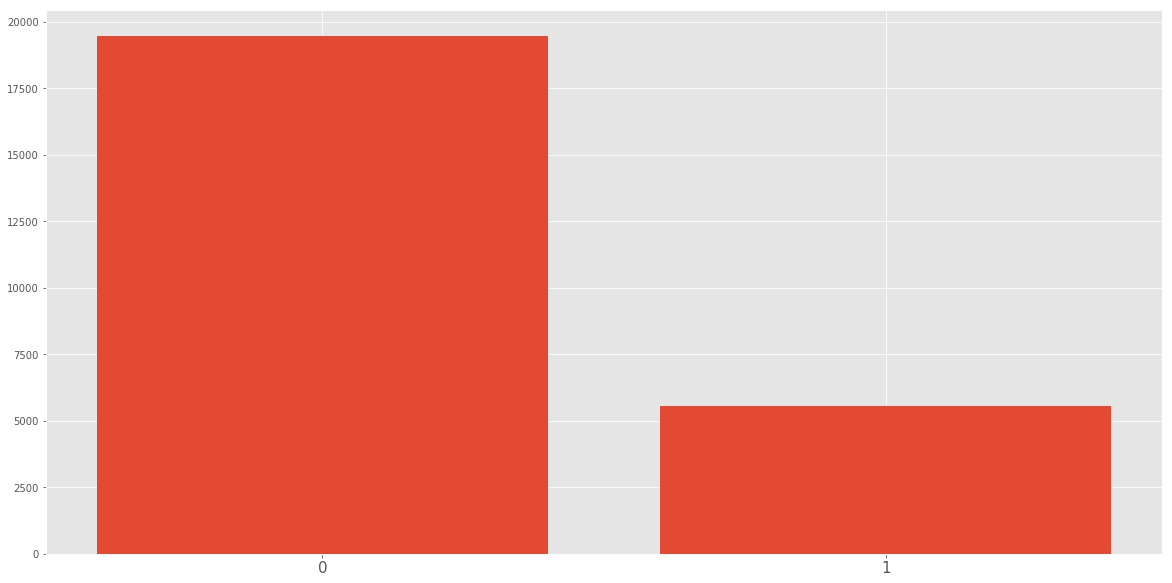

In [35]:
fig = plt.figure(figsize=(20,10))
plt.bar(train_data['Y'].value_counts().index, train_data['Y'].value_counts().values)
plt.xticks(train_data['Y'].value_counts().index,fontsize=15)
plt.show()

Here we notice the label is imbalanced. It will harm our model if you don't deal it very well!

### 4. Build a baseline model

Choose random forest tree model as my first baseline model:

* By principle since it randomizes the variable selection during each tree split it's not prone to overfit unlike other models.
* Don't need much data pre-precessing.
* I used to read that RF don't need CV because it has includes bootstrap sampling and random variable selection in the process of model fit.But still it is strongly recommended to do CV if you can.

In [36]:
from sklearn.model_selection import train_test_split
Y = train_data['Y']
X = train_data.drop(['Y', 'id'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88      3923
          1       0.60      0.30      0.40      1077

avg / total       0.78      0.81      0.78      5000



The baseline model doesn't work pretty well. 
<p>Recall for 1 is important, but it is only 0.30

Linear Regression, Logistic Regression and SVM can be considered as other models worth to try.
For these distanced based model, you need to do on-hot-encoding to categorical features first.

### 5. Basic parameter tuning: Grid Searching

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [39]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values
            , Y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7859480437428017, total=   7.6s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7905177820372444, total=   7.7s
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7899211536548052, total=   7.7s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7968308535459588, total=   7.8s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV] class_weig

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.9s


[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7832189352688909, total=  22.6s
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7902684177888503, total=  22.6s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7995541552296056, total=  22.9s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7868447903113212, total=  23.4s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7913291611290107, total=  25.0s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   58.8s


[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7835626649478864, total=  38.6s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7997199409642097, total=  38.9s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7909289231908834, total=  38.2s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7889680894868318, total=   9.7s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7991649425892577, total=   9.8s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7926825032302317, total=  

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min


[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7886883206429659, total=  10.2s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7965510227333648, total=   9.4s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.792023883334869, total=  36.9s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.7882306246327494, total=  28.3s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.8010909179839547, total=  28.1s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.794293995084024, tota

[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  3.1min remaining:   20.7s


[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7929232246816242, total=  47.0s
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7908524682287661, total=  40.6s
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7960566699721744, total=  32.7s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min finished


In [40]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_)

Best score: 0.794
Best parameters set: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 300}
Scores: [mean: 0.79051, std: 0.00354, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 100}, mean: 0.79024, std: 0.00545, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 300}, mean: 0.79110, std: 0.00520, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 500}, mean: 0.79321, std: 0.00413, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 100}, mean: 0.79412, std: 0.00435, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 300}, mean: 0.79398, std: 0.00411, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}]


/Users/jyguo/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### 6. Model Ensemble

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',class_weight = {0:1, 1:3})
# Use KNerghbors and Logistic Regression for model ensemble as examples
# Actually the categorical variables needs encoding in Kneighbor and LR model
# Because they are distance-based model
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression (class_weight = {0:1, 1:3})

# results from your gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf2)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.00) [Random_Forest]
Accuracy: 0.71 (+/- 0.00) [KNN]
Accuracy: 0.69 (+/- 0.05) [Logistic]
Accuracy: 0.71 (+/- 0.00) [Ensemble]


### 7. Generate the final submission

In [42]:
eclf.fit(X, Y)
y = pd.DataFrame(eclf.predict(test_data.drop(['id'],axis=1)), columns=['y'])
predict_data = pd.concat([y, test_data['id']], axis =1)
predict_data.to_csv('Submmission.csv', index=False)